In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Import data
ticker = 'ALK'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source = 'yahoo', start = '2011-1-13', end = '2021-1-13')['Adj Close']

In [20]:
# Estimating log returns
log_returns = np.log(1+data.pct_change())


<br /><br />
 

$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />


 + Monte Carlo simulations provide thousands of possible call option prices
 + The formula below averages the payoff and discounts it back to today
 + It is another version of Brownian motion, called Euler Discretization



In [21]:
# Determining r
isk free rate
r = 0.0115

In [22]:
# Calculateing standard deviation
stdev = log_returns.std() * 250 **0.5
stdev

ALK    0.383378
dtype: float64

In [23]:
type(stdev)

pandas.core.series.Series

In [24]:
# Transfer the Series object into a numpy array
stdev = stdev.values
stdev

array([0.38337825])

In [25]:
# Forecasting prices one year ahead, calculating with 250 trading days 
# running 10000 simulations of possible prices
T = 1.0
t_intervals = 250
delta_t = T / t_intervals # Fixed time-interval component

iterations = 10000

In [26]:
# Generate a random number 'z' that corresposnds to the distance between the mean and the events, 
# expressed as the number of standard deviation
z = np.random.standard_normal ((t_intervals + 1, iterations))
S = np.zeros_like(z)
S0 = data.iloc[-1]
S [0] = S0

In [29]:
# Solve for S
for t in range (1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2)* delta_t + stdev * delta_t ** 0.5 * z[t])

In [19]:
S

array([[51.84999847, 51.84999847, 51.84999847, ..., 51.84999847,
        51.84999847, 51.84999847],
       [49.37088071, 55.07190767, 53.72304563, ..., 53.09783694,
        51.04282799, 51.14846194],
       [49.65400256, 54.99354104, 54.45745212, ..., 55.52633311,
        51.94635099, 50.27956867],
       ...,
       [81.50210376, 53.77414659, 36.17736015, ..., 85.71901592,
        48.10879931, 22.94355161],
       [83.61094782, 54.15435393, 39.34749822, ..., 87.48969212,
        47.53144229, 22.57571973],
       [85.64023542, 55.77394545, 41.34549138, ..., 86.69763678,
        45.77394363, 22.36712561]])

In [21]:
# Check dimensions of the array
S.shape

(251, 10000)

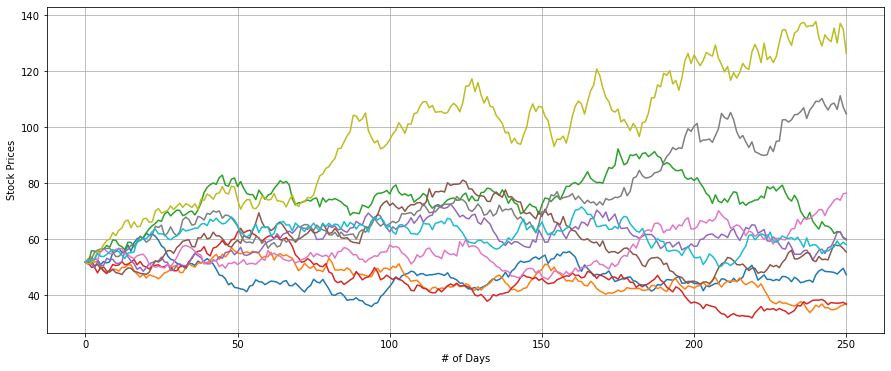

In [36]:
# Plot results
plt.figure(figsize = (15,6))
plt.plot(S[:, :10]);
plt.ylabel('Stock Prices')
plt.xlabel('# of Days')
plt.grid(True)

In [33]:
# Call option should be exercised if S - K > 0 (positive number) 
# should not be exercised if S - K < 0 (negative number)
# We create a numpy array which denotes 0 for negative numbers and 0 and presents all positive numbers. 
# p = payoff as the value of the call depends on whather S - K is positive and how positive it is. 

p = np.maximum(S[-1] - 57,0)
p

array([0.        , 0.        , 2.74732468, ..., 0.        , 0.        ,
       0.        ])

In [34]:
p.shape

(10000,)

In [35]:
# Solve for Black -Scholes Function
# Below the obtained option price
C = np.exp(-r * T)* np.sum(p) / iterations
C

6.106141501459719